In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('Ev_charging.csv', encoding='ISO-8859-1')
print(df.head(10))


   User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0   User_1        BMW i3              108.463007         Station_391   
1   User_2  Hyundai Kona              100.000000         Station_428   
2   User_3    Chevy Bolt               75.000000         Station_181   
3   User_4  Hyundai Kona               50.000000         Station_327   
4   User_5  Hyundai Kona               50.000000         Station_108   
5   User_6   Nissan Leaf               50.000000         Station_335   
6   User_7    Chevy Bolt               85.000000         Station_162   
7   User_8    Chevy Bolt               75.000000         Station_302   
8   User_9    Chevy Bolt               62.000000         Station_493   
9  User_10  Hyundai Kona               50.000000         Station_452   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('Ev_charging.csv', encoding='ISO-8859-1')
print(df.shape)

(1320, 20)


### clean data / removing


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [9]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (Â°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

In [10]:
df.isna().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (Â°C)                            0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

### Remove Duplicates

In [11]:
df = df.drop_duplicates()
print(df.head(10))

   User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0   User_1        BMW i3              108.463007         Station_391   
1   User_2  Hyundai Kona              100.000000         Station_428   
2   User_3    Chevy Bolt               75.000000         Station_181   
3   User_4  Hyundai Kona               50.000000         Station_327   
4   User_5  Hyundai Kona               50.000000         Station_108   
5   User_6   Nissan Leaf               50.000000         Station_335   
6   User_7    Chevy Bolt               85.000000         Station_162   
7   User_8    Chevy Bolt               75.000000         Station_302   
8   User_9    Chevy Bolt               62.000000         Station_493   
9  User_10  Hyundai Kona               50.000000         Station_452   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 

### statistics 

In [12]:
print(df.describe())

       Battery Capacity (kWh)  Energy Consumed (kWh)  \
count             1320.000000            1254.000000   
mean                74.534692              42.642894   
std                 20.626914              22.411705   
min                  1.532807               0.045772   
25%                 62.000000              23.881193   
50%                 75.000000              42.691405   
75%                 85.000000              61.206218   
max                193.003074             152.238758   

       Charging Duration (hours)  Charging Rate (kW)  Charging Cost (USD)  \
count                1320.000000         1254.000000          1320.000000   
mean                    2.269377           25.963003            22.551352   
std                     1.061037           14.011326            10.751494   
min                     0.095314            1.472549             0.234317   
25%                     1.397623           13.856583            13.368141   
50%                     2.258136 

###  Convert dates to datetime format

In [13]:
df[['Charging Start Time', 'Charging End Time']] = df[['Charging Start Time', 'Charging End Time']].apply(pd.to_datetime, errors='coerce')

In [14]:
print(df[['Charging Start Time','Charging End Time']])


     Charging Start Time   Charging End Time
0    2024-01-01 00:00:00 2024-01-01 00:39:00
1    2024-01-01 01:00:00 2024-01-01 03:01:00
2    2024-01-01 02:00:00 2024-01-01 04:48:00
3    2024-01-01 03:00:00 2024-01-01 06:42:00
4    2024-01-01 04:00:00 2024-01-01 05:46:00
...                  ...                 ...
1315 2024-02-24 19:00:00 2024-02-24 20:30:00
1316 2024-02-24 20:00:00 2024-02-24 20:44:00
1317 2024-02-24 21:00:00 2024-02-24 23:03:00
1318 2024-02-24 22:00:00 2024-02-24 23:20:00
1319 2024-02-24 23:00:00 2024-02-24 23:56:00

[1320 rows x 2 columns]


### Correlation

In [15]:
numeric_data = df.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation)


                                          Battery Capacity (kWh)  \
Battery Capacity (kWh)                                  1.000000   
Energy Consumed (kWh)                                   0.000323   
Charging Duration (hours)                              -0.024824   
Charging Rate (kW)                                      0.015866   
Charging Cost (USD)                                    -0.000492   
State of Charge (Start %)                              -0.072148   
State of Charge (End %)                                -0.011512   
Distance Driven (since last charge) (km)               -0.041194   
Temperature (Â°C)                                      -0.036411   
Vehicle Age (years)                                     0.037673   

                                          Energy Consumed (kWh)  \
Battery Capacity (kWh)                                 0.000323   
Energy Consumed (kWh)                                  1.000000   
Charging Duration (hours)                         

### Correlation Heatmap

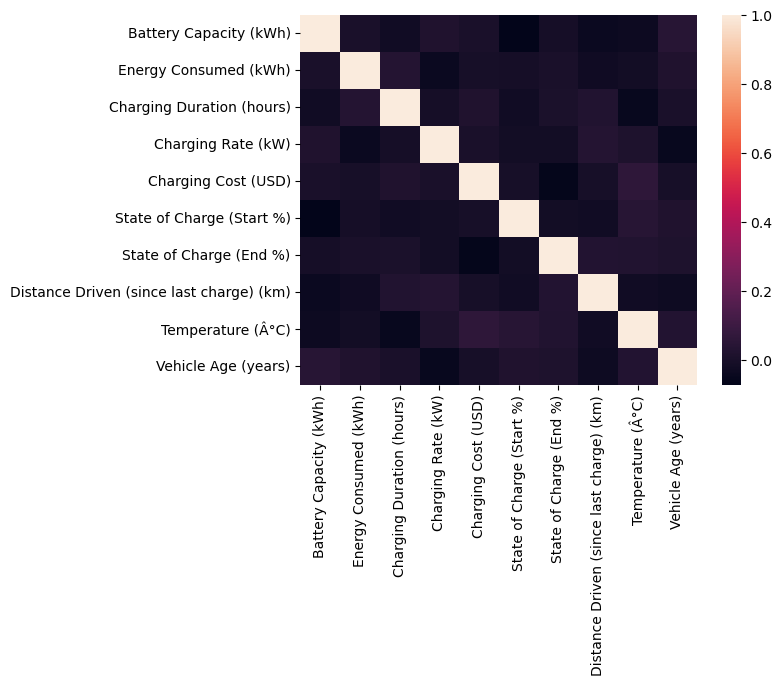

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation)
plt.show()

### Overall Distribution of Vehicle Model by Total Number

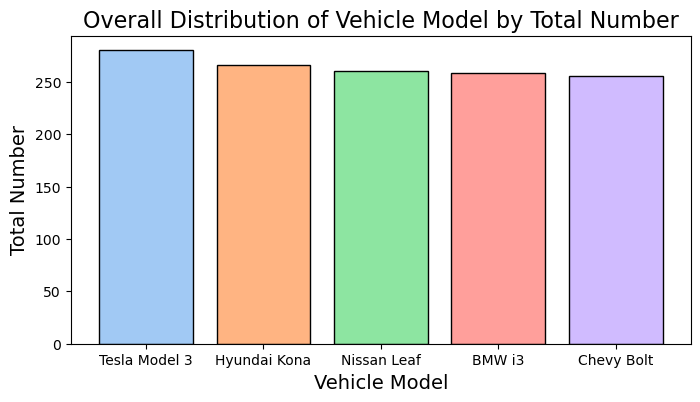

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns  

vehicle_model_counts = df['Vehicle Model'].value_counts() 


colors = sns.color_palette('pastel', len(vehicle_model_counts))

plt.figure(figsize=(8,4))
plt.bar(vehicle_model_counts.index, vehicle_model_counts.values, color=colors, edgecolor='black')


plt.xticks(vehicle_model_counts.index, vehicle_model_counts.index, rotation=0)
plt.xlabel("Vehicle Model", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Vehicle Model by Total Number", fontsize=16)

plt.show()


In [18]:
charge_loc_counts = df['Charging Station Location'].value_counts()
charge_loc_counts

Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64

### Overall Distribution of Charging Location

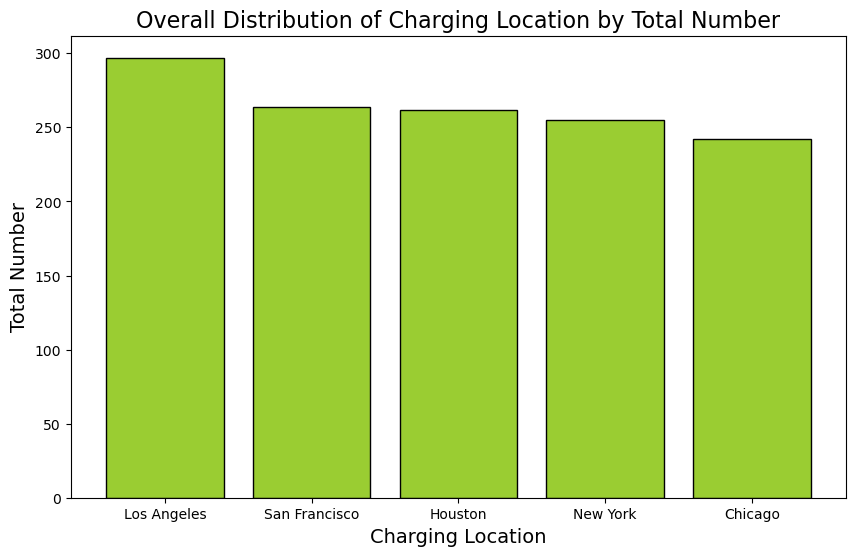

In [19]:
plt.figure(figsize=(10,6))
plt.bar(charge_loc_counts.index, charge_loc_counts.values, color='yellowgreen', edgecolor='black')

plt.xticks(charge_loc_counts.index, charge_loc_counts.index, rotation=0)

plt.xlabel("Charging Location", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Charging Location by Total Number", fontsize=16)

plt.show()

### Overall Distribution of EV Charging by Time of the Day

In [20]:
df['Time of Day'].value_counts()

Time of Day
Evening      362
Morning      336
Night        312
Afternoon    310
Name: count, dtype: int64

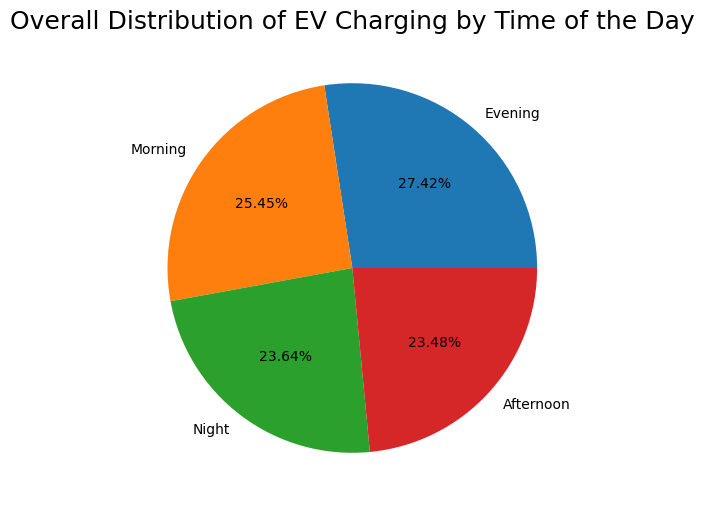

In [21]:
evening_counts = df[df['Time of Day']=='Evening']['Time of Day'].value_counts().values[0]
morning_counts = df[df['Time of Day']=='Morning']['Time of Day'].value_counts().values[0]
night_counts = df[df['Time of Day']=='Night']['Time of Day'].value_counts().values[0]
afternoon_counts = df[df['Time of Day']=='Afternoon']['Time of Day'].value_counts().values[0]

index_values = [evening_counts, morning_counts, night_counts, afternoon_counts]
index_labels=['Evening', 'Morning', 'Night', 'Afternoon']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels =index_labels, autopct='%2.2f%%')
plt.title('Overall Distribution of EV Charging by Time of the Day', fontsize=18)

plt.show()

### Overall Distribution of Day of the Week

In [22]:
day_of_the_week_counts = df['Day of Week'].value_counts()
day_of_the_week_counts

Day of Week
Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: count, dtype: int64

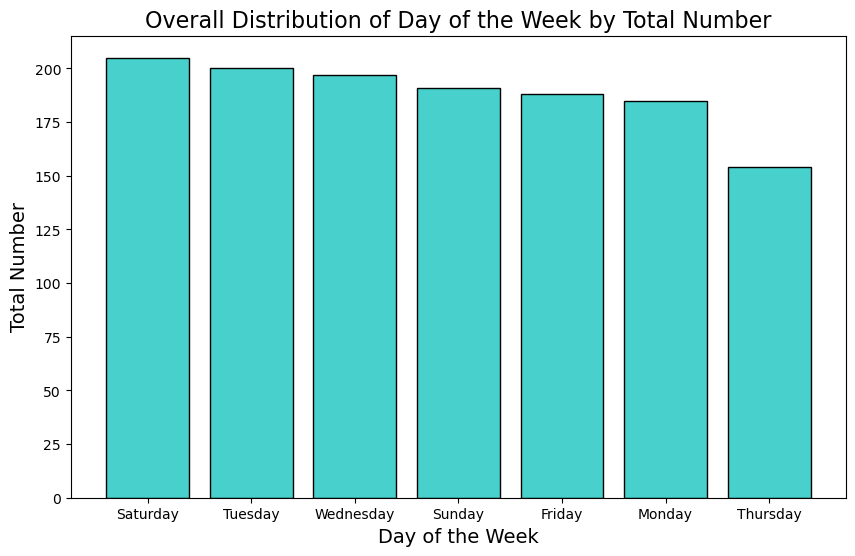

In [23]:
plt.figure(figsize=(10,6))
plt.bar(day_of_the_week_counts.index, day_of_the_week_counts.values, color='mediumturquoise', edgecolor='black')

plt.xticks(day_of_the_week_counts.index, day_of_the_week_counts.index, rotation=0)

plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Day of the Week by Total Number", fontsize=16)

plt.show()

### Charger Type

In [24]:
charger_type_counts = df['Charger Type'].value_counts()
charger_type_counts

Charger Type
Level 1            459
Level 2            431
DC Fast Charger    430
Name: count, dtype: int64

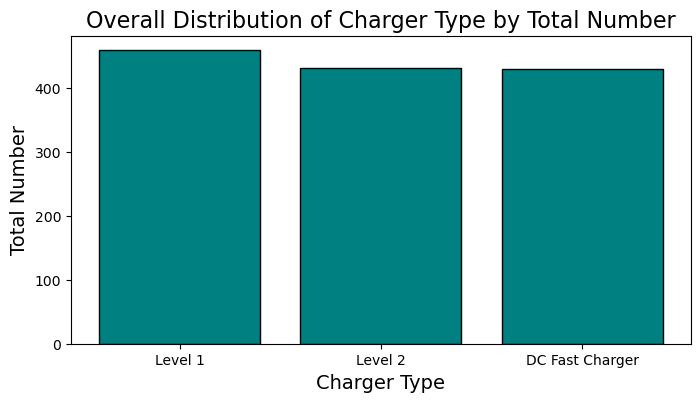

In [25]:
plt.figure(figsize=(8,4))
plt.bar(charger_type_counts.index, charger_type_counts.values, color='teal', edgecolor='black')

plt.xticks(charger_type_counts.index, charger_type_counts.index, rotation=0)

plt.xlabel("Charger Type", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Charger Type by Total Number", fontsize=16)

plt.show()

### Overall Distribution of User Type

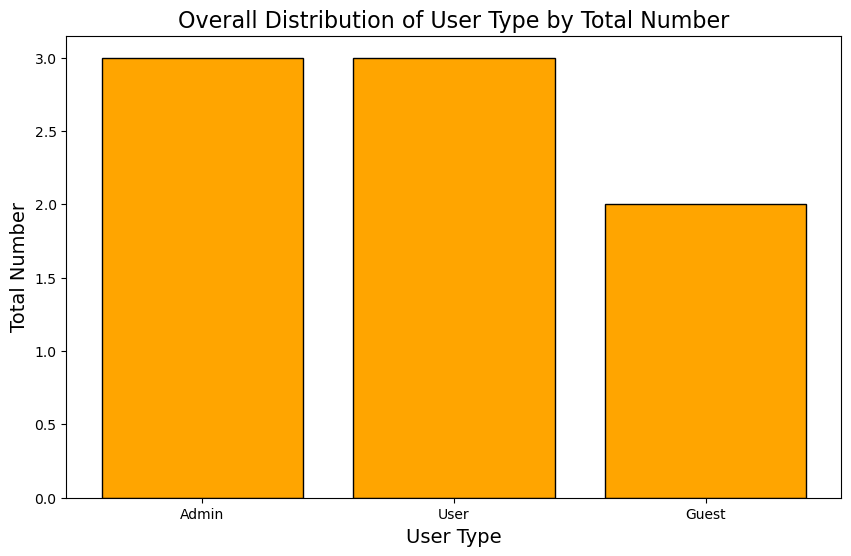

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

data = {'user_type': ['Admin', 'User', 'Guest', 'User', 'Admin', 'Guest', 'User', 'Admin']}
df = pd.DataFrame(data)


user_type_counts = df['user_type'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(user_type_counts.index, user_type_counts.values, color='orange', edgecolor='black')

plt.xticks(user_type_counts.index, user_type_counts.index, rotation=0)
plt.xlabel("User Type", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of User Type by Total Number", fontsize=16)

plt.show()
